In [1]:
from PIL import Image
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from architectures import ResNet50 

# Load Model

In [2]:
np.random.seed(1)
tf.random.set_seed(1234)
model = ResNet50.MyModel()

model.load_weights('Models/ModelResnet50/Resnet50_tf_batch32_NoPretrained').expect_partial()

# Load Data

In [3]:
year = 2019
path = f'../GoogleEarthEngine/patches/{year}/'

# number of patches each month
for month in os.listdir(path):
    if month == '.DS_Store':
        continue
    patches_path = os.path.join(path, month)
    print(f'The number of patches in {month} of {year} are: {len(os.listdir(patches_path))}')


The number of patches in 9 of 2019 are: 33
The number of patches in 11 of 2019 are: 33
The number of patches in 7 of 2019 are: 33
The number of patches in 6 of 2019 are: 33
The number of patches in 1 of 2019 are: 33
The number of patches in 10 of 2019 are: 33
The number of patches in 8 of 2019 are: 33
The number of patches in 4 of 2019 are: 33
The number of patches in 3 of 2019 are: 33
The number of patches in 12 of 2019 are: 33
The number of patches in 2 of 2019 are: 33
The number of patches in 5 of 2019 are: 31


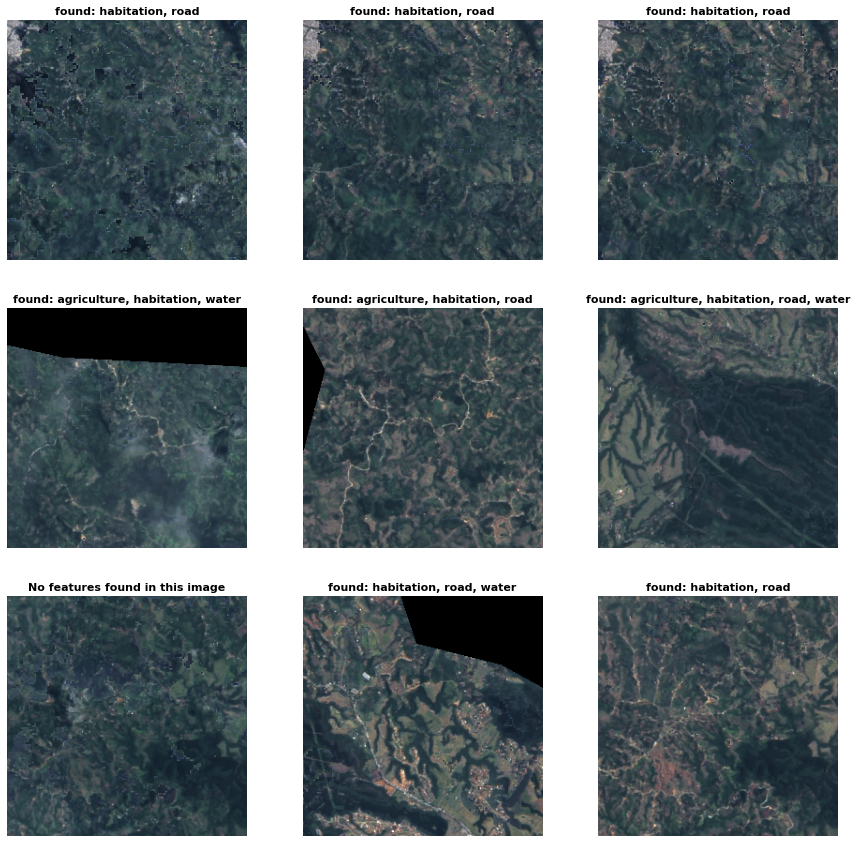

In [4]:
### Plot images: 
months = [4, 6, 8]
years = [2016, 2014, 2019]
# Grid
f, axarr = plt.subplots(len(months), len(years), figsize=(15, 15))
for i, year in enumerate(years):
    for j, month in enumerate(months):
        
        # Read image as array
        path = f'../GoogleEarthEngine/patches/{year}/{month}/'
        img_array = np.asarray(Image.open(path + os.listdir(path)[2]))/255.
        
        # Add batch
        img_batch = np.expand_dims(img_array, axis=0)
        #print(img_batch.shape)
        
        # Predict image
        prediction = model.predict(img_batch)
        prediction = np.rint(prediction)
        prediction = np.squeeze(prediction)
        
        # Select Tags
        list_tags = ['agriculture', 'bare_ground', 'cultivation', 'habitation', 'primary', 'road', 'water']
        # Index of 'agriculture', 'habitation', 'road', 'water'
        index = [0, 3, 5, 6]
        # Text
        in_image = ''
        
        for ind, tag in enumerate(list_tags):
            if (ind in index) and (int(prediction[ind]) == 1):
                if (len(in_image) == 0):
                    in_image = "found: " + tag
                else:
                    in_image = in_image + ', ' + tag
        
        if (len(in_image) == 0):
            in_image = "No features found in this image"
        else: 
            in_image = in_image
        image_label = f"month:{month}, year:{year}"
        
        # Plot
        axarr[i,j].imshow(img_array)
        axarr[i,j].set_title(in_image,fontweight="bold", size=11)
        axarr[i,j].axis('off')

plt.show()

f.savefig('predictions.png')

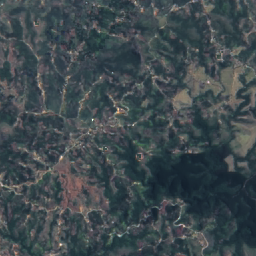

In [5]:
# Show a single image
image = Image.open(path + os.listdir(path)[2])
image

# Load a batch of images

In [6]:
def get_batch(path, normalize = None):

    for i, patch in enumerate(os.listdir(path)):
        image_path = os.path.join(path, patch)
        image = np.array(Image.open(image_path))
        if normalize:
            image = image/255.
        image = np.expand_dims(image, axis=0)
        if i == 0:
            images_batch = image
        else:
            images_batch = np.append(images_batch, image, axis=0)
    print(f'numpy array with shape {images_batch.shape} created')
    print(f'The min value is {images_batch.min()} and max is {images_batch.max()}')
    return images_batch

In [7]:
batch = get_batch(path, normalize=True)

numpy array with shape (33, 256, 256, 3) created
The min value is 0.0 and max is 1.0


# Predict with model

In [8]:
predictions = model.predict(batch)

In [9]:
print('the predictions are: ')
# Transform predictions to 0 or 1
predictions = np.rint(predictions)
predictions

the predictions are: 


array([[0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1., 1., 0.],
 

# Compare

In [10]:
# Select Tags
list_tags = ['agriculture', 'bare_ground', 'cultivation', 'habitation', 'primary', 'road', 'water']

In [11]:
index = [0, 3, 5, 6]

tag_popayan = {}

for i in range(len(list_tags)):
    if i in index:
        tag_popayan[list_tags[i]] = predictions[:,i].sum()

tag_popayan

{'agriculture': 12.0, 'habitation': 29.0, 'road': 27.0, 'water': 12.0}

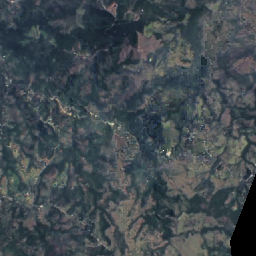

In [12]:
Image.open(path + os.listdir(path)[30])